In [113]:
import scanpy as sc

In [114]:
import pandas as pd

In [115]:
import numpy as np

In [116]:
from tqdm import tqdm
# use a progress bar 

In [117]:
sample_folders = ["RB01_rep1", "RB01_rep2", "RB02_rep1", "RB02_rep2", "RB03_rep1", "RB03_rep2", "RB04", "RB05", "RB06", "RB07",]
# Create an empty list first
adata_list = []

In [118]:
# use a for-loop to read in all the files
for sample in tqdm(sample_folders): 
    pathname = "D:/Research raw data/"+sample
    print("Reading files at:" + pathname)
    adata=sc.read_10x_mtx("D:/Research raw data/"+sample)
    patient_id = sample[:4] # extract the patient info
    sample_id = sample # extract the sample info
    # we add the patient and sample information into our adata object, specifically, the .obs slot
    # .obs stands for observation i.e every single-cell is an observation
    adata.obs["patient_id"] = patient_id
    adata.obs["sample_id"] = sample_id
    # the function will complain that we need to run this
    adata.var_names_make_unique() # a var, stands for variable i.e. genes. so this function is to make the gene names unique
    # why? because multiple ensembl gene ids can map to the same gene e.g. spliced isoforms. sometimes we care about spliced isoforms and we want to keep them separate
    # so something like IL6, would be become IL6 and IL6-1
    adata_list.append(adata) # append to my adata_list above, iteratively

# finally, concatenate all the objects into a singlular one
adata = sc.concat(adata_list)
# print what the final object looks like
adata


  0%|          | 0/10 [00:00<?, ?it/s]

Reading files at:D:/Research raw data/RB01_rep1


 10%|█         | 1/10 [00:56<08:28, 56.51s/it]

Reading files at:D:/Research raw data/RB01_rep2


 20%|██        | 2/10 [01:45<06:55, 51.90s/it]

Reading files at:D:/Research raw data/RB02_rep1


 30%|███       | 3/10 [02:14<04:51, 41.60s/it]

Reading files at:D:/Research raw data/RB02_rep2


 40%|████      | 4/10 [02:27<03:01, 30.22s/it]

Reading files at:D:/Research raw data/RB03_rep1


 50%|█████     | 5/10 [03:17<03:06, 37.31s/it]

Reading files at:D:/Research raw data/RB03_rep2


 60%|██████    | 6/10 [04:20<03:04, 46.03s/it]

Reading files at:D:/Research raw data/RB04


 70%|███████   | 7/10 [05:58<03:09, 63.29s/it]

Reading files at:D:/Research raw data/RB05


 80%|████████  | 8/10 [07:42<02:32, 76.01s/it]

Reading files at:D:/Research raw data/RB06


 90%|█████████ | 9/10 [10:16<01:40, 100.33s/it]

Reading files at:D:/Research raw data/RB07


100%|██████████| 10/10 [12:37<00:00, 75.79s/it] 
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 91572 × 33538
    obs: 'patient_id', 'sample_id'

In [119]:
# check if location is directory.
import os

print(os.path.isdir("D:/Research raw data/RB01_rep1"))

# check if something is a file
print(os.path.isfile("D:/Research raw data/RB01_rep1/barcodes.tsv.gz"))


True
True


In [120]:
folder = "RB05"
folder[:5]

'RB05'

In [121]:
# save the adata, so you don't have to keep reading in like this
adata.write_h5ad("D:/Research raw data/adata_rb.h5ad", compression="gzip")

In [122]:
# Everytime i open the file 
#in the future, you can open a new notebook and just do
import scanpy as sc
adata_rb = sc.read_h5ad("D:/Research raw data/adata_rb.h5ad")
adata_rb

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\anndata\_core\anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 91572 × 33538
    obs: 'patient_id', 'sample_id'

In [123]:
adata_rb.obs_names_make_unique()
adata_rb.write_h5ad("D:/Research raw data/adata_rb.h5ad", compression="gzip")



In [124]:
# say if you have a control object read in the same as above:
# you can contenate like:
# adata_combined = sc.concat([adata_rb, adata_ctrl])
# print what the final object looks like 
# adata_combined

In [125]:
import scanpy as sc
adata_rb = sc.read_h5ad("D:/Research raw data/adata_rb.h5ad")
adata_rb

AnnData object with n_obs × n_vars = 91572 × 33538
    obs: 'patient_id', 'sample_id'

In [126]:
import numpy as np
import pandas as pd

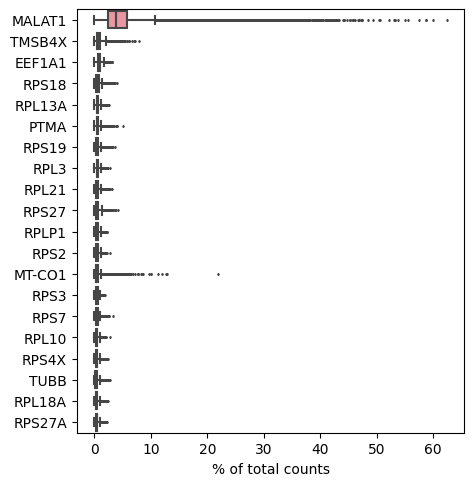

In [127]:
sc.pl.highest_expr_genes(adata_rb, n_top=20, )


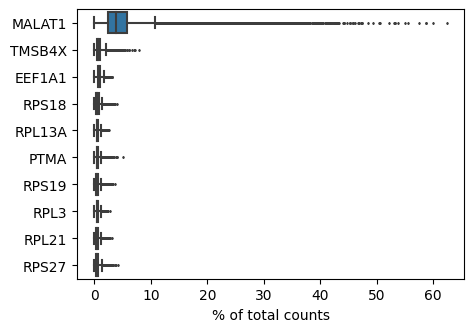

In [128]:
sc.pl.highest_expr_genes(adata_rb, n_top=10, )


In [129]:
sc.pp.filter_cells(adata_rb, min_genes=200)
sc.pp.filter_genes(adata_rb, min_cells=3)
adata_rb

AnnData object with n_obs × n_vars = 91555 × 24842
    obs: 'patient_id', 'sample_id', 'n_genes'
    var: 'n_cells'

In [130]:
adata_rb.var['mt'] = adata_rb.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata_rb, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


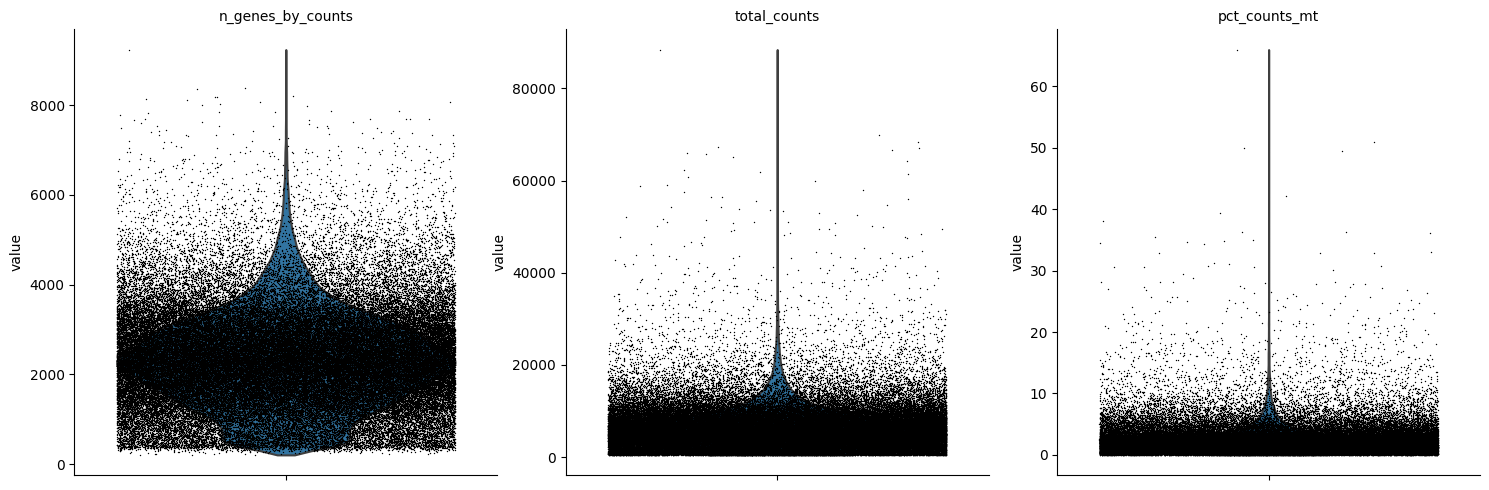

In [131]:
sc.pl.violin(adata_rb, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

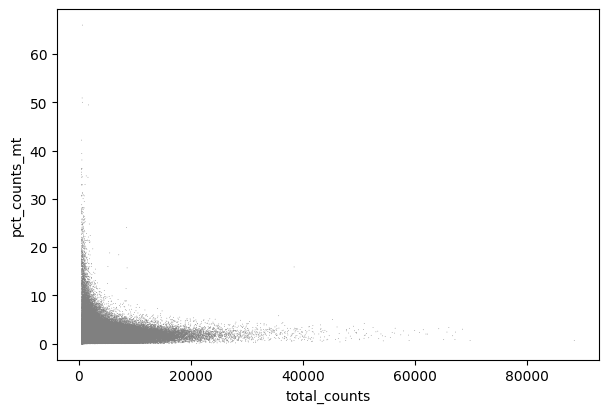

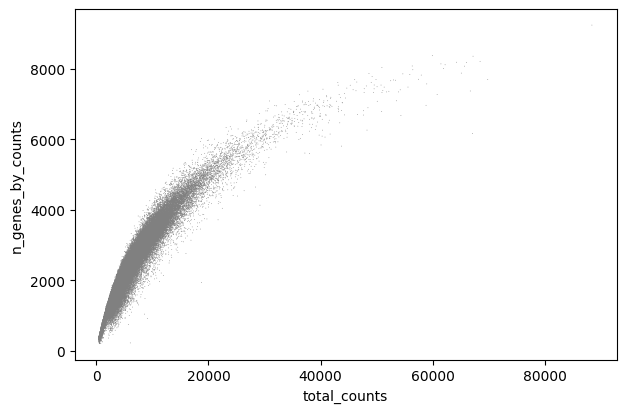

In [132]:
sc.pl.scatter(adata_rb, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata_rb, x='total_counts', y='n_genes_by_counts')

In [133]:
adata_rb = adata_rb[adata_rb.obs.n_genes_by_counts < 2500, :]
adata_rb = adata_rb[adata_rb.obs.pct_counts_mt < 5, :]


In [134]:
sc.pp.normalize_total(adata_rb, target_sum=1e4)


c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\preprocessing\_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [135]:
sc.pp.log1p(adata_rb)


In [136]:
sc.pp.highly_variable_genes(adata_rb, min_mean=0.0125, max_mean=3, min_disp=0.5)


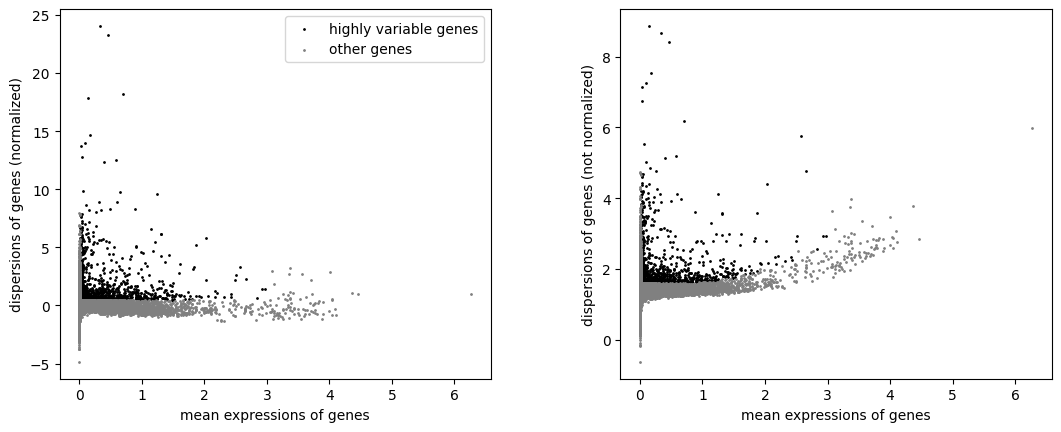

In [137]:
sc.pl.highly_variable_genes(adata_rb)


In [138]:
adata_rb.raw = adata_rb


In [139]:
adata_rb = adata_rb[:, adata_rb.var.highly_variable]


In [140]:
sc.pp.regress_out(adata_rb, ['total_counts', 'pct_counts_mt'])


In [141]:
sc.pp.scale(adata_rb, max_value=10)


In [142]:
sc.tl.pca(adata_rb, svd_solver='arpack')


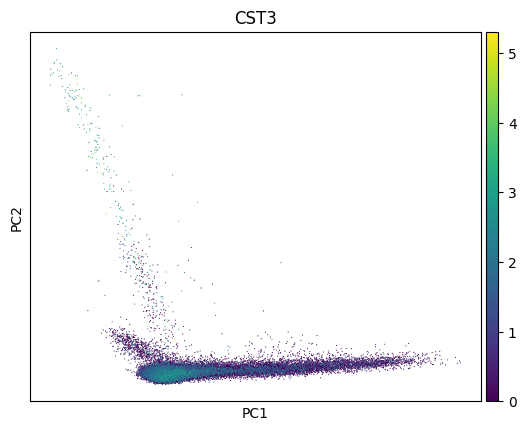

In [143]:
sc.pl.pca(adata_rb, color='CST3')


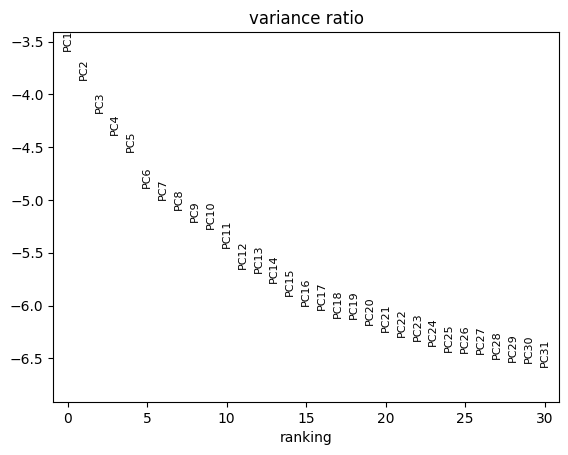

In [144]:
sc.pl.pca_variance_ratio(adata_rb, log=True)


In [157]:
import os 

In [158]:
!mkdir write

A subdirectory or file write already exists.


In [159]:
results_file = 'write/rb.h5ad'  # the file that will store the analysis results


In [162]:
adata_rb.write(results_file)


In [163]:
adata_rb

AnnData object with n_obs × n_vars = 47323 × 1324
    obs: 'patient_id', 'sample_id', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [164]:
sc.pp.neighbors(adata_rb, n_neighbors=10, n_pcs=40)

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\umap\distances.py:1086: 

In [166]:
pip install leidenalg


  Obtaining dependency information for leidenalg from https://files.pythonhosted.org/packages/64/7e/636c4688de6d8dd8ce4ddf3dce8046f8c3402f0bb329a7b77df854ca5f19/leidenalg-0.10.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for igraph<0.11,>=0.10.0 from https://files.pythonhosted.org/packages/e4/2c/aea4c9ff8d33c1ba45d3964d758019097c363363c1a67dbada9d9f98b3d9/igraph-0.10.6-cp39-abi3-win_amd64.whl.metadata
  Using cached texttable-1.6.7-py2.py3-none-any.whl (10 kB)
Using cached leidenalg-0.10.0-cp311-cp311-win_amd64.whl (1.5 MB)
Using cached igraph-0.10.6-cp39-abi3-win_amd64.whl (2.9 MB)


In [167]:
import leidenalg as leiden

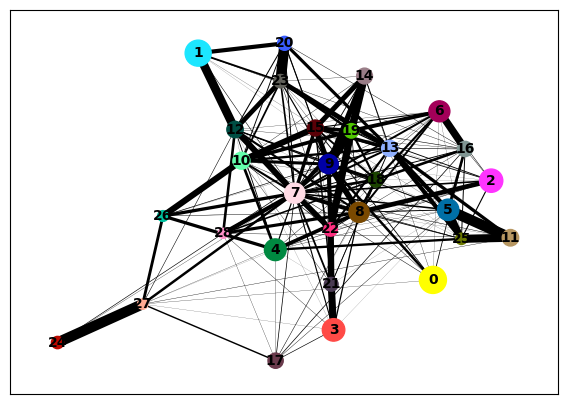

In [174]:
sc.tl.leiden(adata_rb)
sc.tl.paga(adata_rb)
sc.pl.paga(adata_rb)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_rb, init_pos='paga')

In [175]:
sc.tl.umap(adata_rb)


In [177]:
import scanpy as sc
import pandas as pd
import numpy as np 

KeyError: 'Could not find key PPBP in .var_names or .obs.columns.'

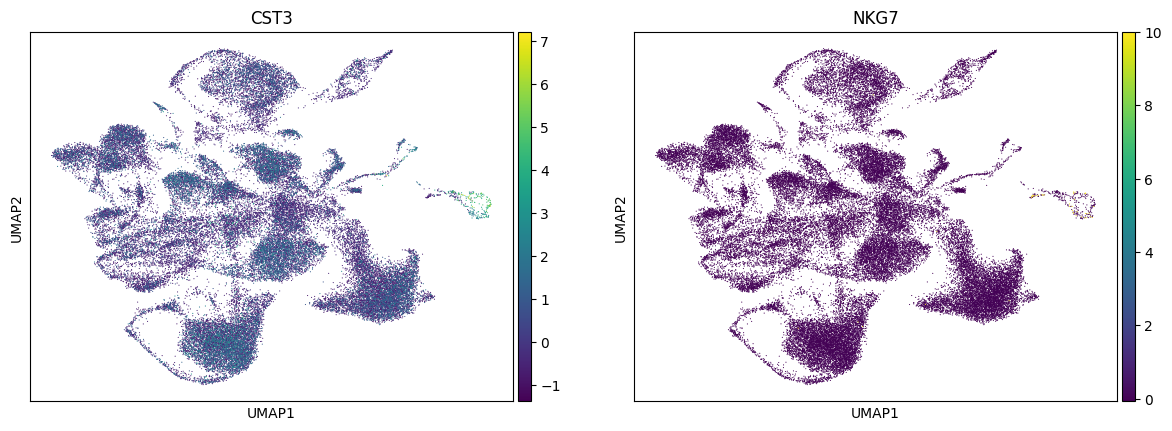

In [182]:
sc.pl.umap(adata_rb, color=['CST3', 'NKG7', 'PPBP'], use_raw=False)

c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


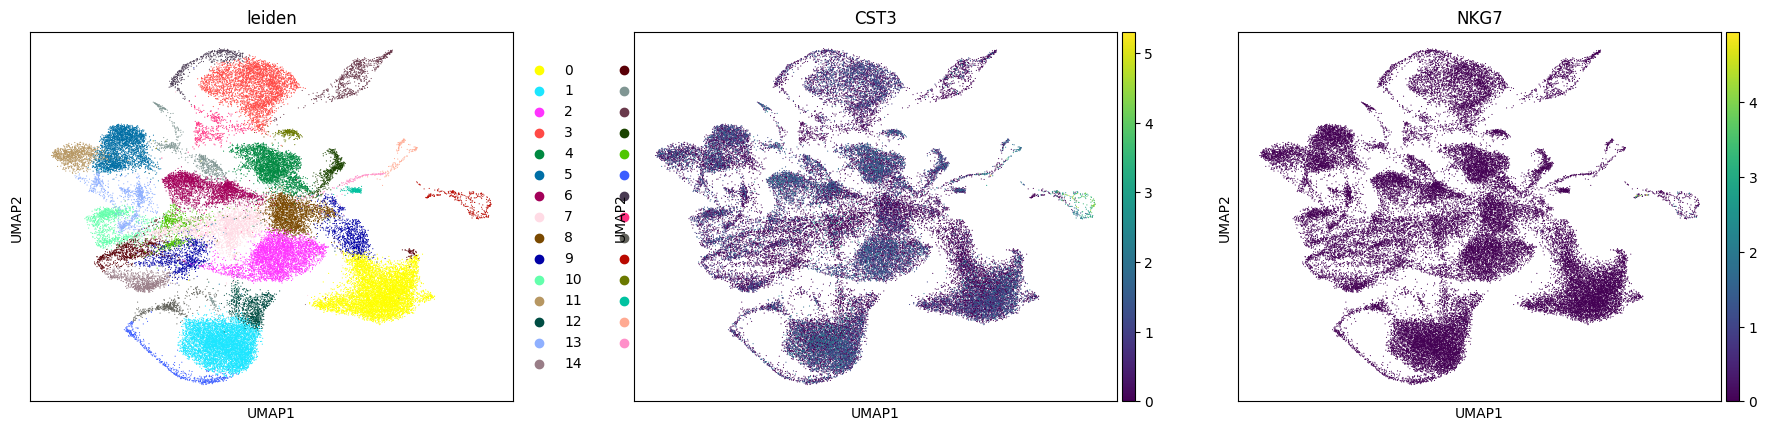

In [181]:
sc.pl.umap(adata_rb, color=['leiden', 'CST3', 'NKG7'])

In [192]:
adata_rb.write(results_file)


c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:399: PerformanceWarning: DataF

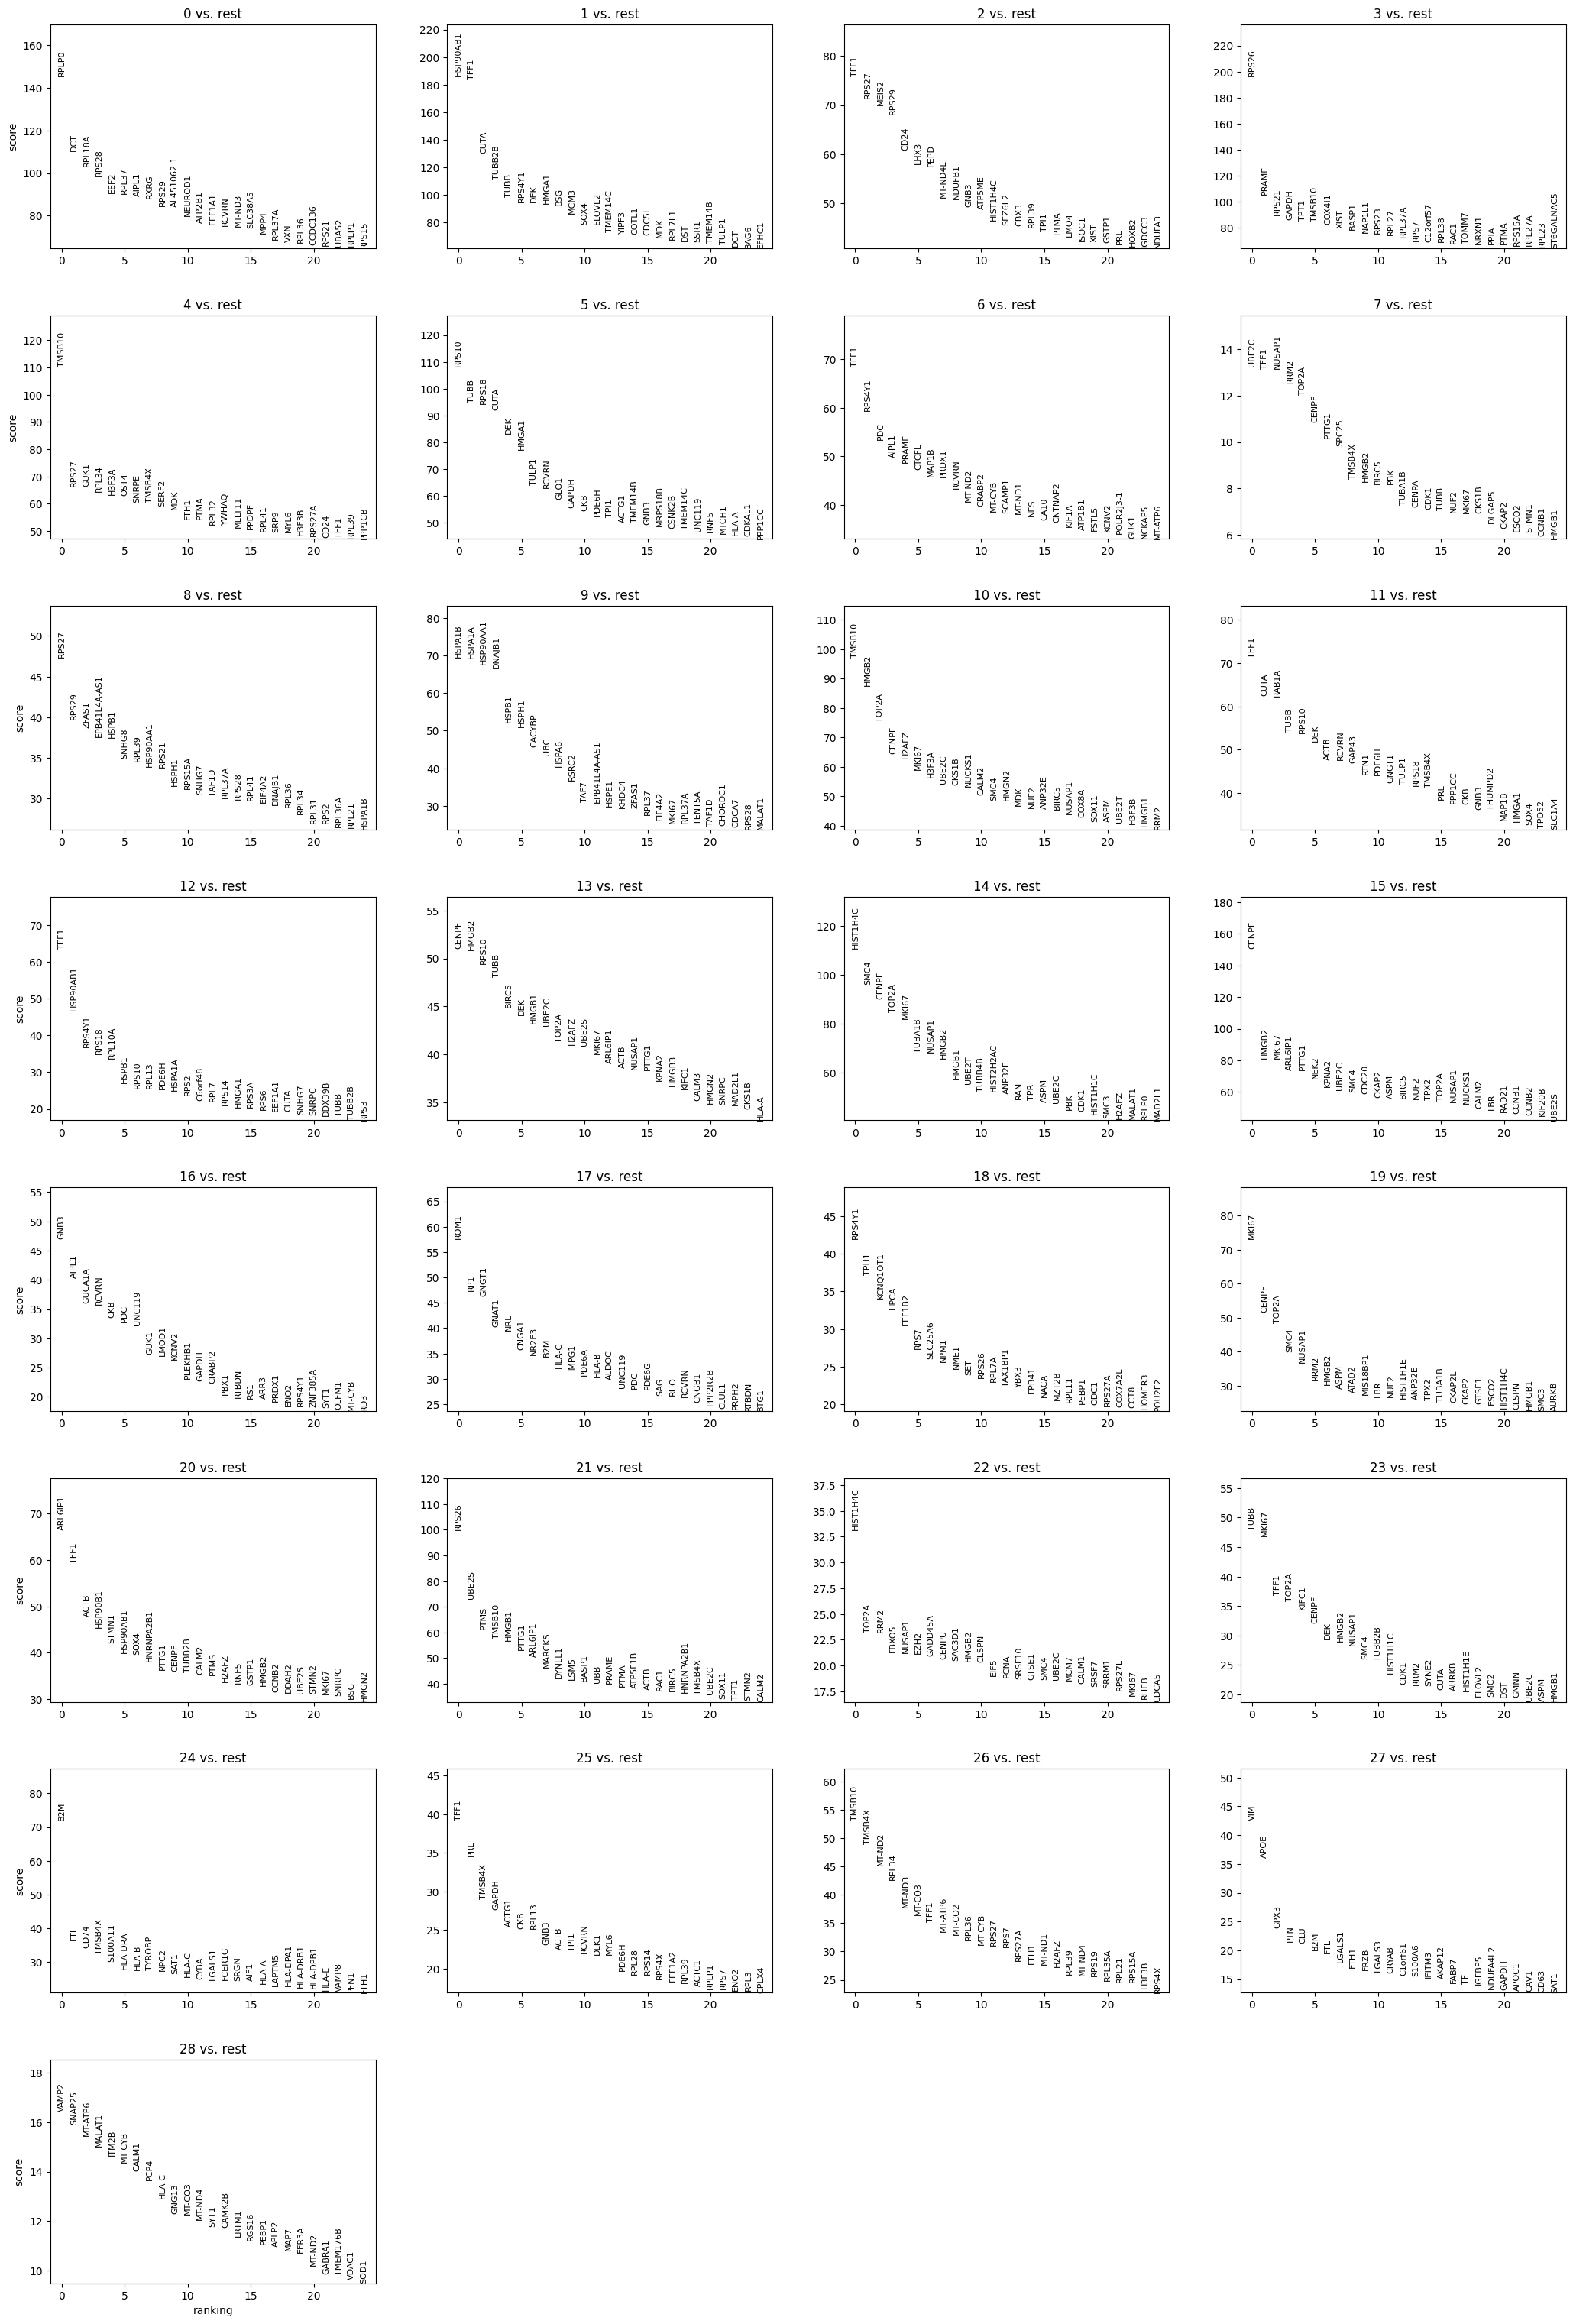

In [201]:
sc.tl.rank_genes_groups(adata_rb , 'leiden', method='t-test')
sc.pl.rank_genes_groups(adata_rb , n_genes=25, sharey=False)

ranking genes


c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
c:\Users\charl\miniconda3\envs\MEDI7281\Lib\site-packages\scanpy\tools\_rank_genes_groups.py:399: PerformanceWarning: DataF

    finished (0:07:23)


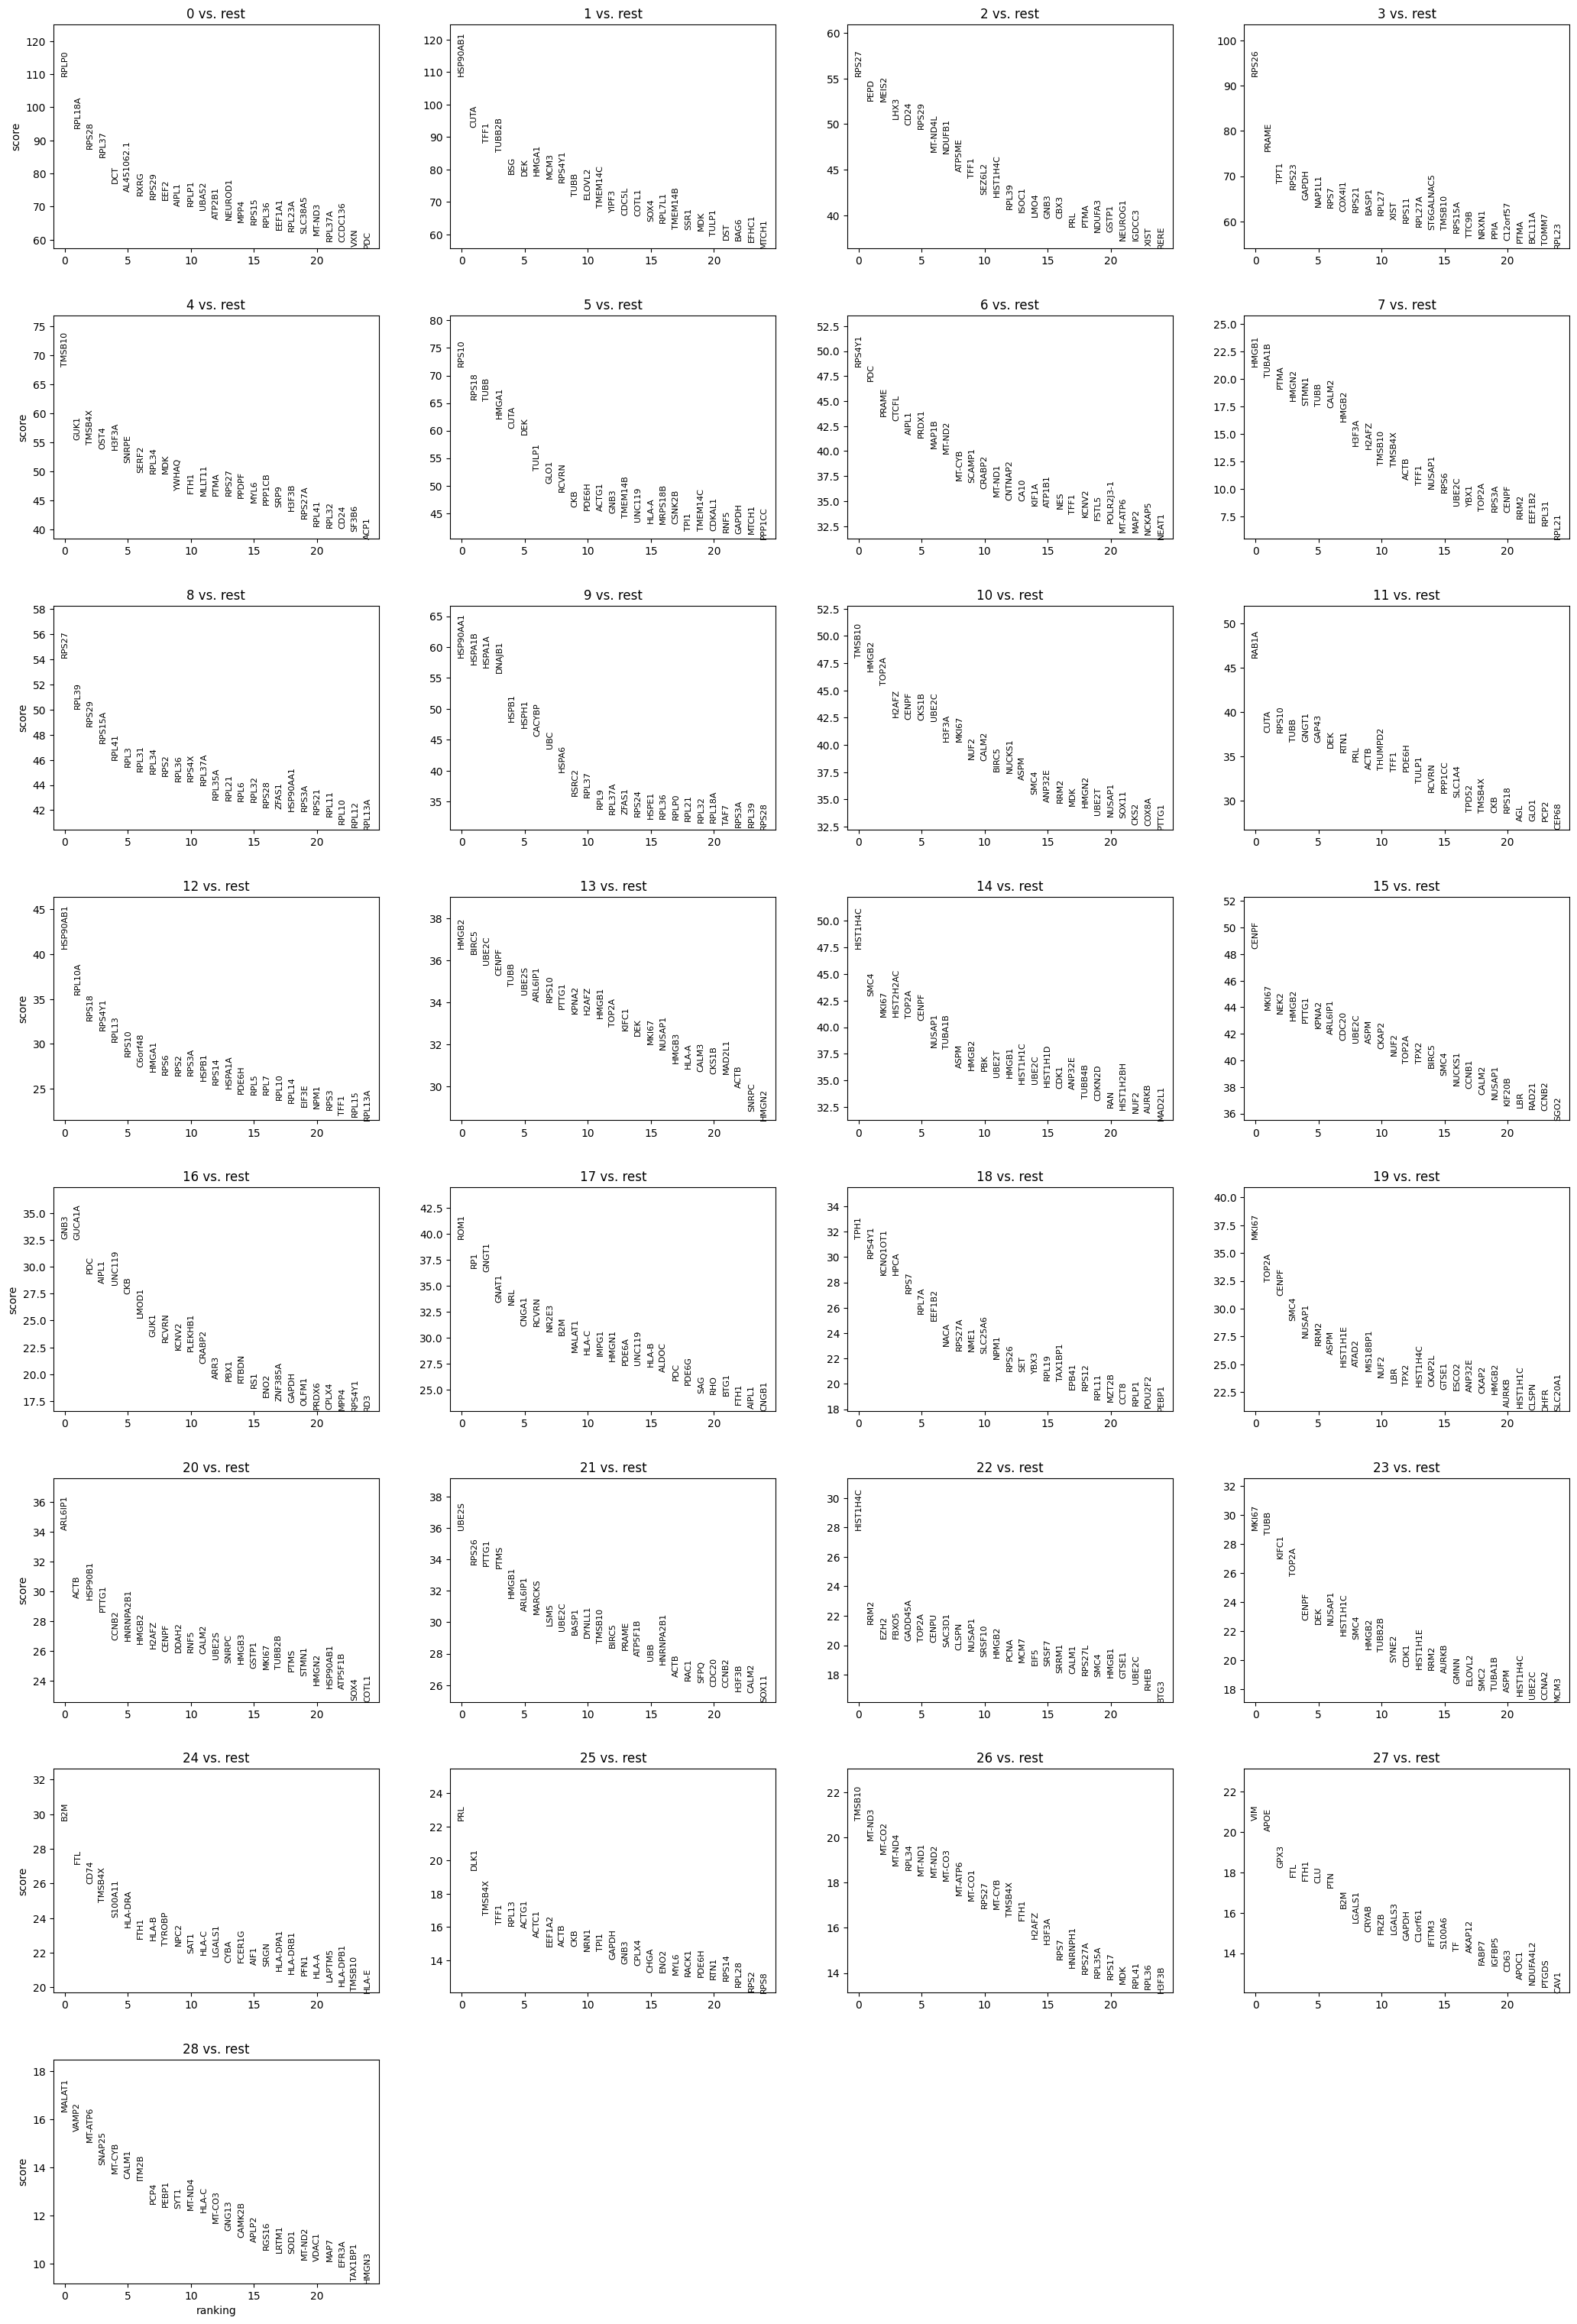

In [202]:
sc.settings.verbosity = 2  # reduce the verbosity
sc.tl.rank_genes_groups(adata_rb, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(adata_rb, n_genes=25, sharey=False)